# 1. Stats

In [4]:
%run ./scripts/stats.py -c ../ancora-3.0.1es

Basic Statistics
sents: 17378
tokens: 517194
words: 46501
tags: 85

Most Frequent POS Tags
tag	freq	%	top
sp000	79884	15.45	(de, en, a, del, con)
nc0s000	63452	12.27	(presidente, equipo, partido, país, año)
da0000	54549	10.55	(la, el, los, las, El)
aq0000	33906	6.56	(pasado, gran, mayor, nuevo, próximo)
fc	30147	5.83	(,)
np00000	29111	5.63	(Gobierno, España, PP, Barcelona, Madrid)
nc0p000	27736	5.36	(años, millones, personas, países, días)
fp	17512	3.39	(.)
rg	15336	2.97	(más, hoy, también, ayer, ya)
cc	15023	2.90	(y, pero, o, Pero, e)

Word Ambiguity Levels
n	words	%	top
1	43972	94.56	(,, con, por, su, El)
2	2318	4.98	(el, en, y, ", los)
3	180	0.39	(de, la, ., un, no)
4	23	0.05	(que, a, dos, este, fue)
5	5	0.01	(mismo, cinco, medio, ocho, vista)
6	3	0.01	(una, como, uno)
7	0	0.00	()
8	0	0.00	()
9	0	0.00	()


# 2. Etiquetado de Secuencias: Parte 2

Usaremos los scripts train.py y eval.py del práctico 1:

## 2.1. Baseline Malo: Todo es Sustantivo Singular

Primero "entrenamos" este baseline (no hace nada en realidad):

In [16]:
%run ./scripts/train.py -c ../ancora-3.0.1es -m badbase -o badbase

Luego evaluamos. Usamos la opción '-m' para imprimir la matrz de confusión:

In [18]:
%run ./scripts/eval.py -c ../ancora-3.0.1es -i badbase -m


Accuracy: 12.65% / 0.00% / 12.65% (total / known / unk)

g \ m	sp000	nc0s000	da0000	aq0000	fc	nc0p000	rg	np00000	fp	cc
sp000	-	14.39	-	-	-	-	-	-	-	-	
nc0s000	-	12.65	-	-	-	-	-	-	-	-	
da0000	-	9.70	-	-	-	-	-	-	-	-	
aq0000	-	7.28	-	-	-	-	-	-	-	-	
fc	-	5.85	-	-	-	-	-	-	-	-	
nc0p000	-	5.53	-	-	-	-	-	-	-	-	
rg	-	3.73	-	-	-	-	-	-	-	-	
np00000	-	3.58	-	-	-	-	-	-	-	-	
fp	-	3.55	-	-	-	-	-	-	-	-	
cc	-	3.41	-	-	-	-	-	-	-	-	


La matriz de confusión muestra en la fila X columna Y la proporción de veces que el tagger eligió el tag Y pero el tag verdadero es X. Sólo se imprime la matriz para los 10 tags más frecuentes.

## 2.2. Baseline (Menos Malo): Etiqueta Más Frecuente

**Primero resolver ejercicio 2 del práctico!**

In [2]:
%run ./scripts/train.py -c ../ancora-3.0.1es -m base -o base

In [25]:
%run ./scripts/eval.py -c ../ancora-3.0.1es -i base -m


Accuracy: 87.58% / 95.27% / 18.01% (total / known / unk)

g \ m	sp000	nc0s000	da0000	aq0000	fc	nc0p000	rg	np00000	fp	cc
sp000	14.28	0.05	-	-	-	-	0.01	-	-	-	
nc0s000	0.00	12.22	-	0.24	-	0.00	0.03	0.00	-	0.00	
da0000	-	0.15	9.54	-	-	-	-	-	-	-	
aq0000	0.01	2.05	-	4.84	-	0.13	0.00	-	-	-	
fc	-	-	-	-	5.85	-	-	-	-	-	
nc0p000	-	1.24	-	0.21	-	4.07	-	-	-	-	
rg	0.02	0.31	-	0.03	-	-	3.29	-	-	0.02	
np00000	0.00	2.04	-	0.00	-	0.00	-	1.52	-	0.00	
fp	-	-	-	-	-	-	-	-	3.55	-	
cc	0.00	0.01	-	-	-	-	0.05	0.00	-	3.34	


In [18]:
entries = ['eva', 'peron']
total=4
error_count={'eva': {'eva':1, 'peron':4, 'vandor':7}, 
             'peron': {'eva':2, 'peron':5, 'vandor':8}, 
             'vandor': {'eva':3, 'peron':6, 'vandor':9}} 
acc = dict(zip(entries, [dict(zip(entries, [0 for i in entries]) )] ))
for t1 in entries:
    for t2 in entries:
        try:
            if error_count[t1][t2] > 0:
                acc[t1][t2] = error_count[t1][t2] / total
        except KeyError:
            print(acc.keys())

dict_keys(['eva'])
dict_keys(['eva'])


In [22]:
acc = dict(zip(entries, (dict(zip(entries, [0 for i in entries]))) ))

In [23]:
acc

{'sp000': 'sp000',
 'nc0s000': 'nc0s000',
 'da0000': 'da0000',
 'aq0000': 'aq0000',
 'fc': 'fc',
 'nc0p000': 'nc0p000',
 'rg': 'rg',
 'np00000': 'np00000',
 'fp': 'fp',
 'cc': 'cc'}

<class 'collections.defaultdict'>
defaultdict(<function <lambda> at 0x7fcb6451ba60>, {'np00000': defaultdict(<class 'set'>, {'nc0s000': {0}}), 'vmsp000': defaultdict(<class 'set'>, {'nc0s000': {0}}), 'sp000': defaultdict(<class 'set'>, {'nc0s000': {0}})})
<class 'collections.defaultdict'>
defaultdict(<function <lambda> at 0x7fcb6451ba60>, {'np00000': defaultdict(<class 'set'>, {'nc0s000': {0, 1}}), 'vmsp000': defaultdict(<class 'set'>, {'nc0s000': {0}}), 'sp000': defaultdict(<class 'set'>, {'nc0s000': {0}}), 'cs': defaultdict(<class 'set'>, {'pr000000': {1}}), 'pi000000': defaultdict(<class 'set'>, {'di0000': {1}}), 'di0000': defaultdict(<class 'set'>, {'nc0p000': {1}})})
<class 'collections.defaultdict'>
defaultdict(<function <lambda> at 0x7fcb6451ba60>, {'np00000': defaultdict(<class 'set'>, {'nc0s000': {0, 1}}), 'vmsp000': defaultdict(<class 'set'>, {'nc0s000': {0}}), 'sp000': defaultdict(<class 'set'>, {'nc0s000': {0}}), 'cs': defaultdict(<class 'set'>, {'pr000000': {1, 2}}), 'pi00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



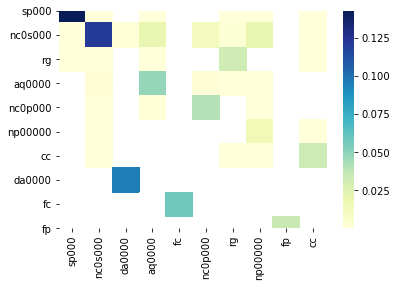

In [34]:
%run ./scripts/eval.py -c ../ancora-3.0.1es -i base --heatm

In [6]:
%run ./scripts/eval.py --help

SyntaxError: invalid syntax (eval.py, line 136)

In [7]:
%run ./scripts/eval.py -h

Evaulate a tagger.

Usage:
  eval.py [options] -c <path> -i <file> 
  eval.py -h | --help

Options:
  -c <path>     Ancora corpus path.
  -i <file>     Tagging model file.
  -p            Show progress bar.
  -m            Show confusion matrix.
  -H --heatm    Show heatmap of confusion matrix.
  -h --help     Show this screen.


**Se puede ver que uno de los principales errores del tagger es confundir nombre propio (np00000) con nombre común (nc0s000), con un 2.05% del error total.**

In [ ]:
sns.heatmap(a)

## 2.3. Análisis de Errores

El script de evaluación eval.py calcula variables útiles para hacer análisis de errores:

- **error_count:** matriz de confusión completa.
- **error_sents:** matriz de índices de las oraciones en las que ocurre cada error.

Por ejemplo, podemos ver algunas oraciones en las que el tagger confunde nombre propio con nombre común:

In [7]:
error_count['np00000']['nc0s000']  # / total da 2.05%

1939

In [44]:
sorted(error_sents['np00000']['nc0s000'])[:10]

[0, 1, 4, 5, 6, 7, 8, 9, 12, 13]

Veamos la primer oración:

In [48]:
sent = sents[0]
words, tags = zip(*sent)  # separar las palabras de los tags
sent[:10]

[('El', 'da0000'),
 ('presidente', 'nc0s000'),
 ('del', 'sp000'),
 ('órgano', 'nc0s000'),
 ('regulador', 'aq0000'),
 ('de', 'sp000'),
 ('las', 'da0000'),
 ('Telecomunicaciones', 'np00000'),
 ('se', 'p0000000'),
 ('mostró', 'vmis000')]

In [49]:
model.tag(words[:10])

['da0000',
 'nc0s000',
 'sp000',
 'nc0s000',
 'aq0000',
 'sp000',
 'da0000',
 'nc0s000',
 'p0000000',
 'vmis000']

In [50]:
model.unknown('Telecomunicaciones')

True

Es claro que el tagger se puede mejorar para palabras desconocidas mirando características como el uso de mayúsculas y también de caracteres no estándar del inglés (e.g. letras acentuadas).